## Load data

In [1]:
# print current directory
import os
print(os.getcwd())

/home/gr00stl/Nextcloud/UNI/wdwa/human_activity


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/train.csv')


In [3]:
# change current working directory to 'data_analysis'
import os
os.chdir('data_analysis')


Basic Data Inspection

In [4]:
print(data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [5]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None


In [6]:

print(data.describe())


       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


## EDA

### Stationary vs. Moving Activities

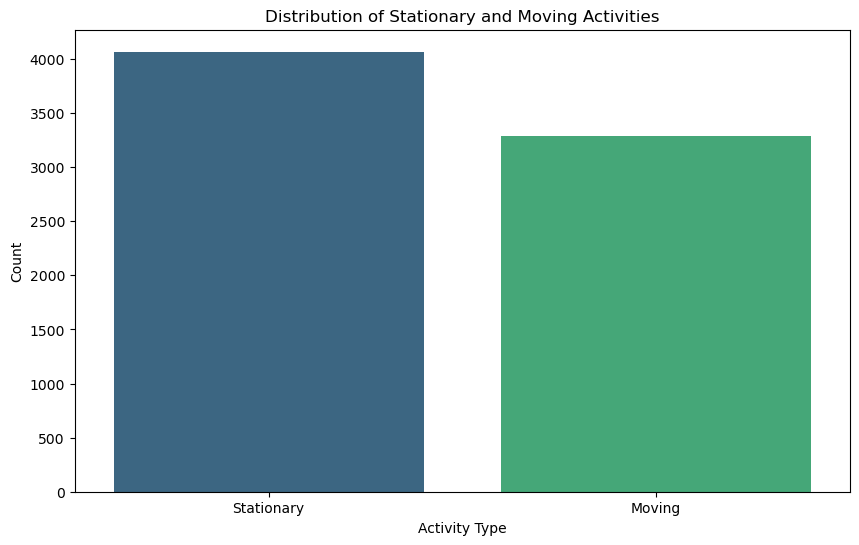

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define stationary and moving activities
stationary_activities = ['SITTING', 'STANDING', 'LAYING']
moving_activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

# Create a new column for activity type
data['ActivityType'] = data['Activity'].apply(lambda x: 'Stationary' if x in stationary_activities else 'Moving')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='ActivityType', data=data, palette='viridis')
plt.title('Distribution of Stationary and Moving Activities')
plt.xlabel('Activity Type')
plt.ylabel('Count')

# save as png
plt.savefig('stationary_moving_activities.png')

plt.show()




Distribution of Stationary and Moving Activities **Interpretation**:

- The bar graph shows the count of stationary and moving activities.
- **Stationary activities** (e.g., sitting, standing, lying) have a higher count compared to moving activities (e.g., walking, walking upstairs, walking downstairs).
- This indicates that the dataset contains more instances of stationary activities than moving activities.

### Magnitude of Acceleration

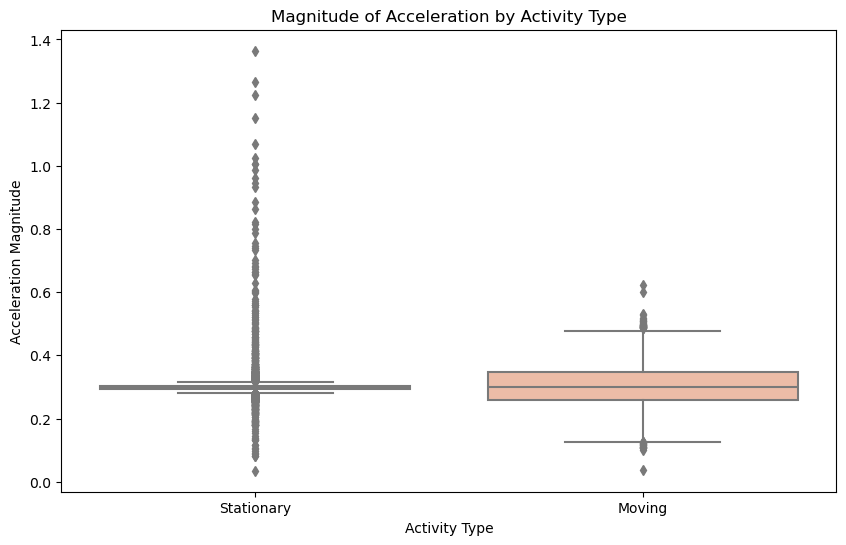

In [12]:
import numpy as np

# Calculate the magnitude of acceleration
data['AccMagnitude'] = np.sqrt(data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']].apply(lambda x: x**2).sum(axis=1))

# Plot the magnitude of acceleration
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityType', y='AccMagnitude', data=data, palette='coolwarm')
plt.title('Magnitude of Acceleration by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Acceleration Magnitude')

# save as png
plt.savefig('magnitude_of_acceleration.png')

plt.show()




Magnitude of Acceleration by Activity Type **Interpretation**:

- The box plot shows the distribution of acceleration magnitudes for stationary and moving activities.
- **Stationary activities** have a very narrow range of acceleration magnitudes, but with many outliers. These outliers indicate occasional movements or sensor noise.
- **Moving activities** exhibit a broader range of acceleration magnitudes, reflecting the varied nature of movements. The outliers in moving activities are fewer and less extreme compared to stationary activities.
- This suggests that moving activities involve more dynamic and varied acceleration patterns, while stationary activities are generally more consistent with occasional spikes.

### Position of Gravity Acceleration Components


/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1000 with 0 Axes>

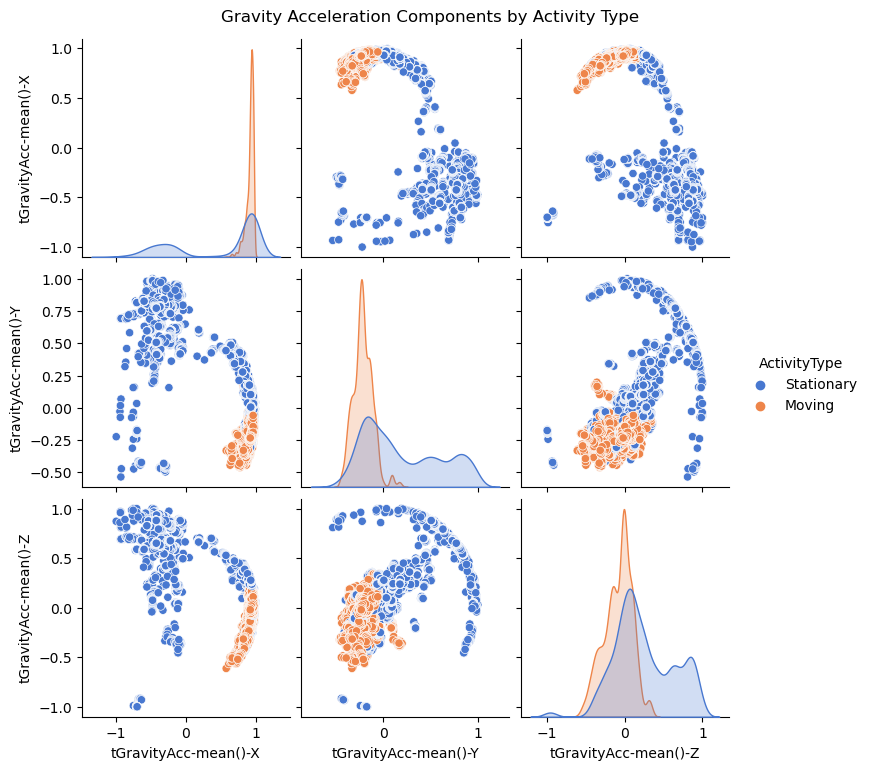

In [9]:
# Plot gravity acceleration components
plt.figure(figsize=(15, 10))
sns.pairplot(data, hue='ActivityType', vars=['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z'], palette='muted')
plt.suptitle('Gravity Acceleration Components by Activity Type', y=1.02)
# Save the figure
plt.savefig('gravity_acceleration_components.png', bbox_inches='tight')

plt.show()

Gravity Acceleration Components by Activity Type **Interpretation**:

- The scatter plots show the distribution of gravity acceleration components (X, Y, Z) for stationary and moving activities.
- **X-axis (tGravityAcc-mean()-X)**:
    
    - Stationary activities (blue) have a narrower range centered around 0, with some outliers.
    - Moving activities (orange) have a wider spread of values, indicating more variation in the X-axis gravity component during movement.
    
- **Y-axis (tGravityAcc-mean()-Y)**:
    
    - Similar to the X-axis, stationary activities have a more concentrated range, while moving activities show a broader distribution.
    
- **Z-axis (tGravityAcc-mean()-Z)**:
    
    - Both stationary and moving activities show a bimodal distribution, suggesting distinct patterns in the Z-axis gravity component.
    - Stationary activities are more clustered, while moving activities are more spread out.
    

**Components Explanation**:

- **tGravityAcc-mean()-X, tGravityAcc-mean()-Y, tGravityAcc-mean()-Z**: These components represent the mean gravity acceleration along the X, Y, and Z axes, respectively.
- The scatter plots help visualize how these components differ between stationary and moving activities. Stationary activities tend to have more consistent gravity acceleration values, while moving activities show more variability.

### KL divergence

In [13]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Define a range of perplexity values
perplexities = range(5, 51, 5)  # [5, 10, 15, ..., 50]
kl_divergences = []

# Extract feature vectors and labels
X = data.drop(['subject', 'Activity', 'ActivityType'], axis=1)


# Select relevant features for t-SNE
features = data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 
                 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Define perplexities to test
perplexities = np.arange(5, 55, 5)
kl_divergences = []

# Run t-SNE for each perplexity and collect the KL Divergence values
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, verbose=1)
    tsne_results = tsne.fit_transform(features_scaled)
    kl_divergences.append(tsne.kl_divergence_)

# Create a DataFrame to store the results
kl_df = pd.DataFrame({'Perplexity': perplexities, 'KL Divergence': kl_divergences})

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 0.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.075463
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.455376
[t-SNE] KL divergence after 1000 iterations: 1.340067
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 0.272s...
[t-SNE] Computed conditional 

In [16]:
# switch to directory within 'data_analysis' -> 'data_analysis/tsne_results'
os.chdir('tsne_results')

/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gr00stl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


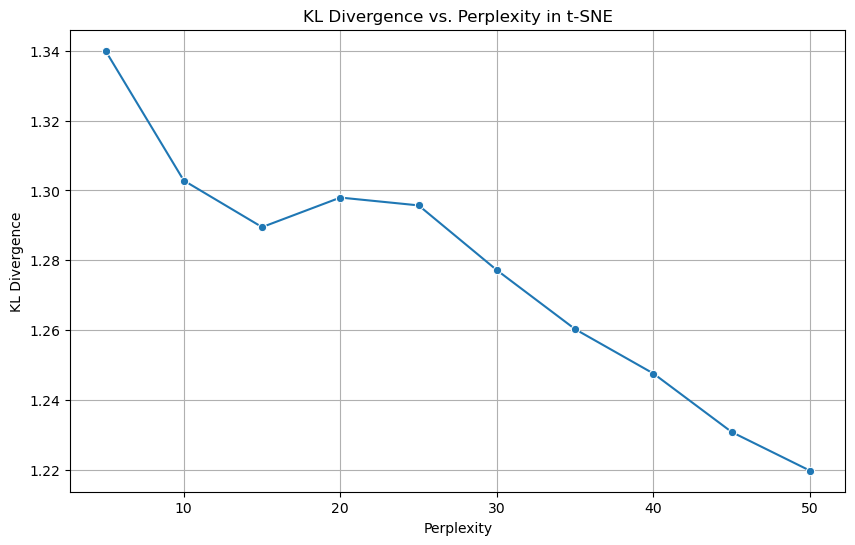

In [17]:
# Plot the KL Divergence values against the perplexities
plt.figure(figsize=(10, 6))
sns.lineplot(x='Perplexity', y='KL Divergence', data=kl_df, marker='o')
plt.title('KL Divergence vs. Perplexity in t-SNE')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.grid(True)
# save as png
plt.savefig('kl_divergence_vs_perplexity.png')
plt.show()

#### KL Divergence vs. Perplexity in t-SNE
- This line chart shows the relationship between KL Divergence and Perplexity values ranging from 5 to 50. KL Divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. In the context of t-SNE, lower KL Divergence indicates a better representation of the high-dimensional data in the lower-dimensional space.
- Observation: As the perplexity increases from 5 to 50, the KL Divergence generally decreases, indicating that higher perplexity values tend to provide a better representation of the data.
- Insight: A perplexity value around 50 seems to yield the lowest KL Divergence, suggesting it might be the optimal choice for this dataset.


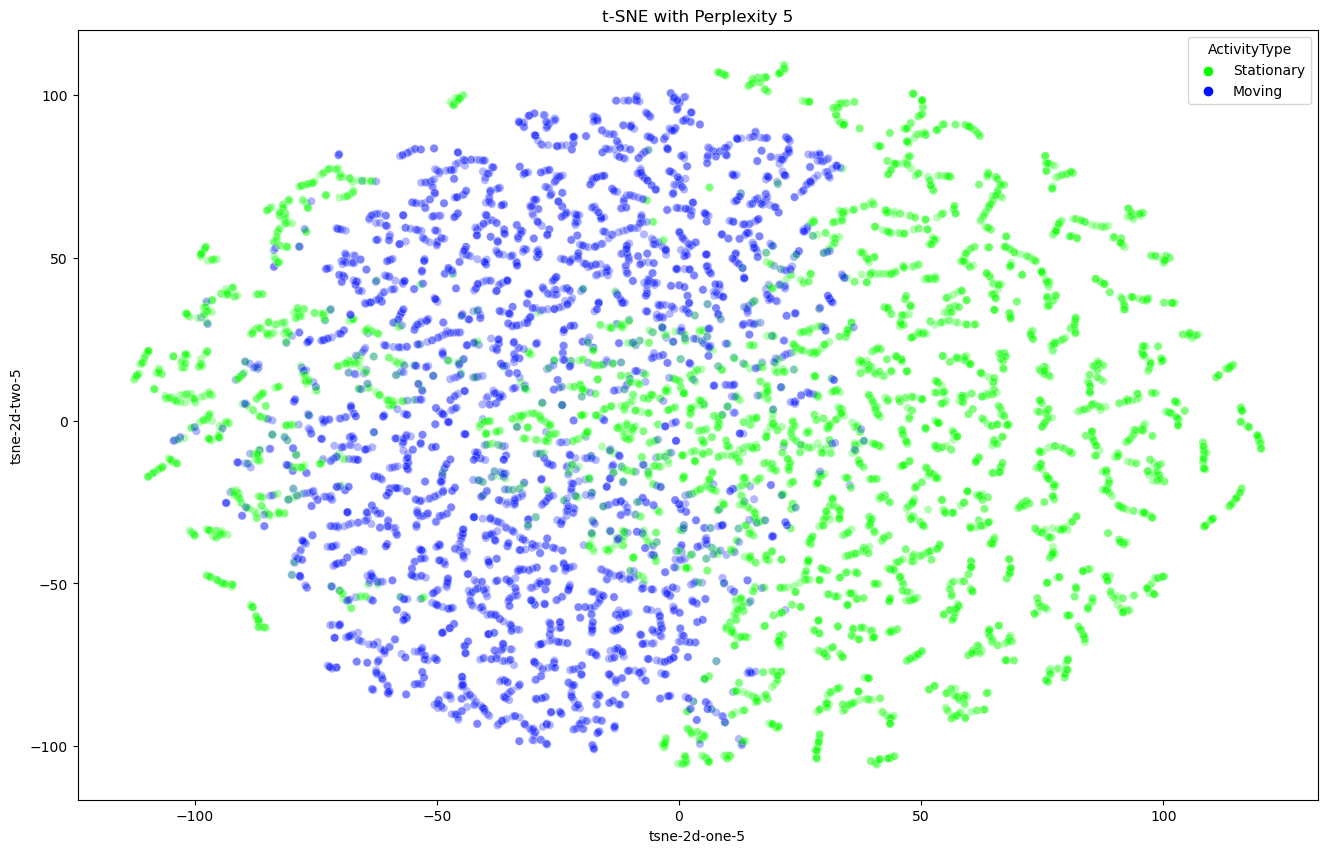

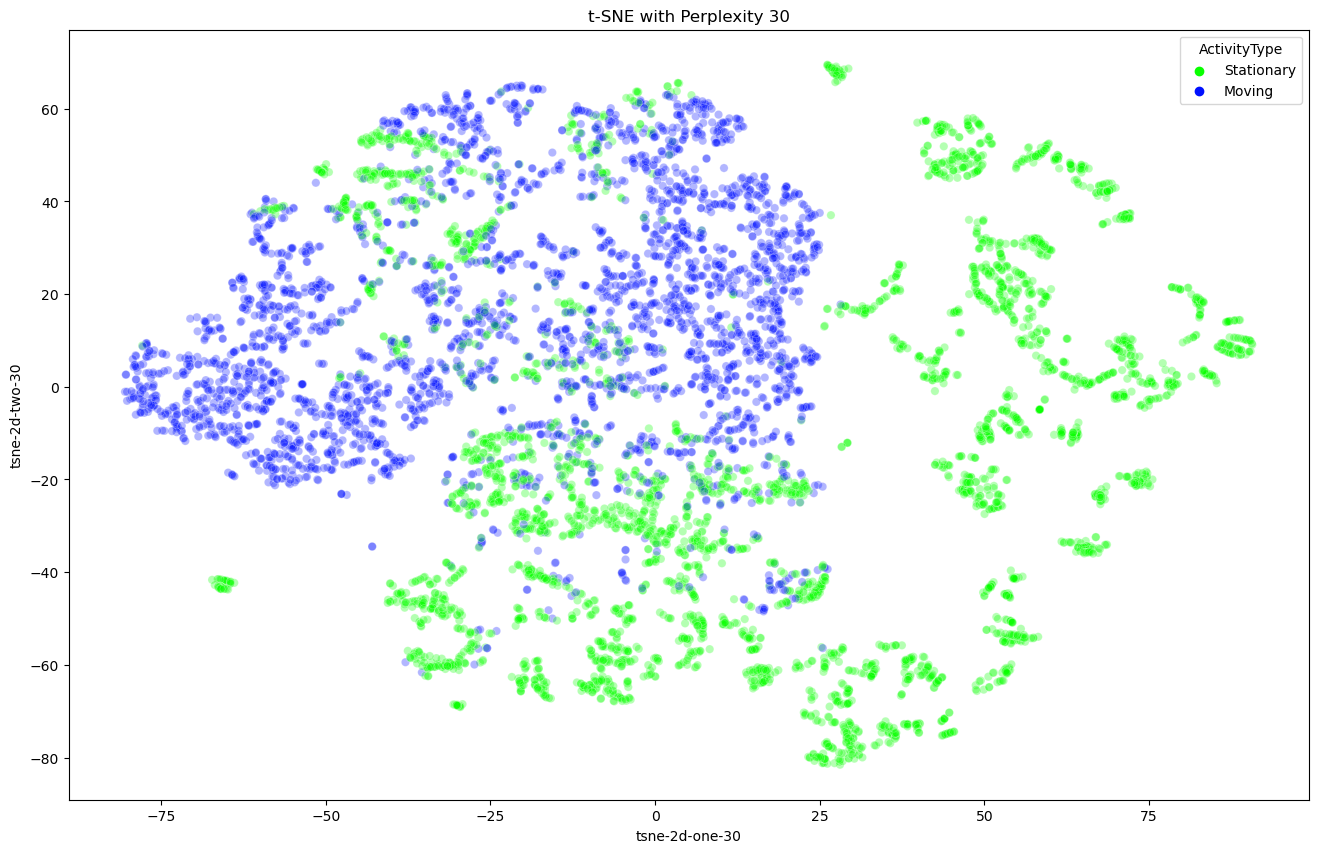

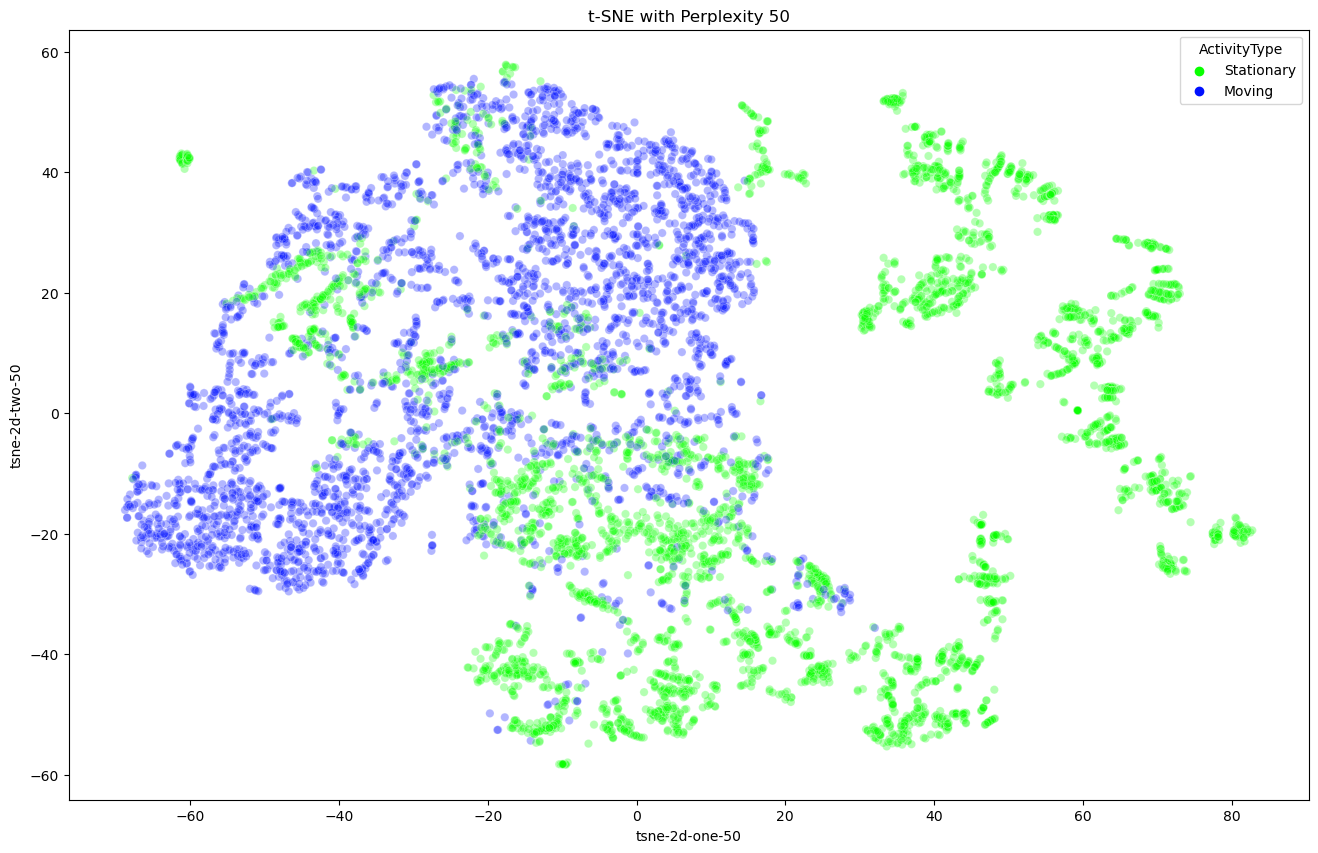

In [21]:

# Select features for t-SNE
features = data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# t-SNE with different perplexities
perplexities = [5, 30, 50]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features_scaled)
    
    data[f'tsne-2d-one-{perplexity}'] = tsne_results[:,0]
    data[f'tsne-2d-two-{perplexity}'] = tsne_results[:,1]
    
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x=f'tsne-2d-one-{perplexity}', y=f'tsne-2d-two-{perplexity}',
        hue='ActivityType',
        palette=sns.color_palette("hsv", 2),
        data=data,
        legend="full",
        alpha=0.3
    )
    plt.title(f't-SNE with Perplexity {perplexity}')
    # save as png
    plt.savefig(f'tsne_by_activity_type_perplexity_{perplexity}.png', bbox_inches='tight')

    plt.show()



## t-SNE by Activity Type

### t-SNE with Perplexity 5
This scatter plot shows the t-SNE visualization of the data with a perplexity value of 5. The data points are colored based on the activity type: green for "Stationary" and blue for "Moving".

- **Observation**: The data points are somewhat scattered, with some overlap between the two activity types. The clusters are not very distinct.
- **Insight**: A low perplexity value like 5 may not capture the global structure of the data well, leading to less distinct clusters.

### t-SNE with Perplexity 30
This scatter plot shows the t-SNE visualization of the data with a perplexity value of 30.

- **Observation**: The clusters are more distinct compared to the perplexity 5 plot. There is a clearer separation between the "Stationary" and "Moving" activity types.
- **Insight**: A perplexity value of 30 provides a better balance between local and global data structure, resulting in more distinct clusters.

### t-SNE with Perplexity 50
This scatter plot shows the t-SNE visualization of the data with a perplexity value of 50.

- **Observation**: The clusters are even more distinct, with a clear separation between the "Stationary" and "Moving" activity types.
- **Insight**: A higher perplexity value like 50 captures the global structure of the data well, leading to well-separated clusters.


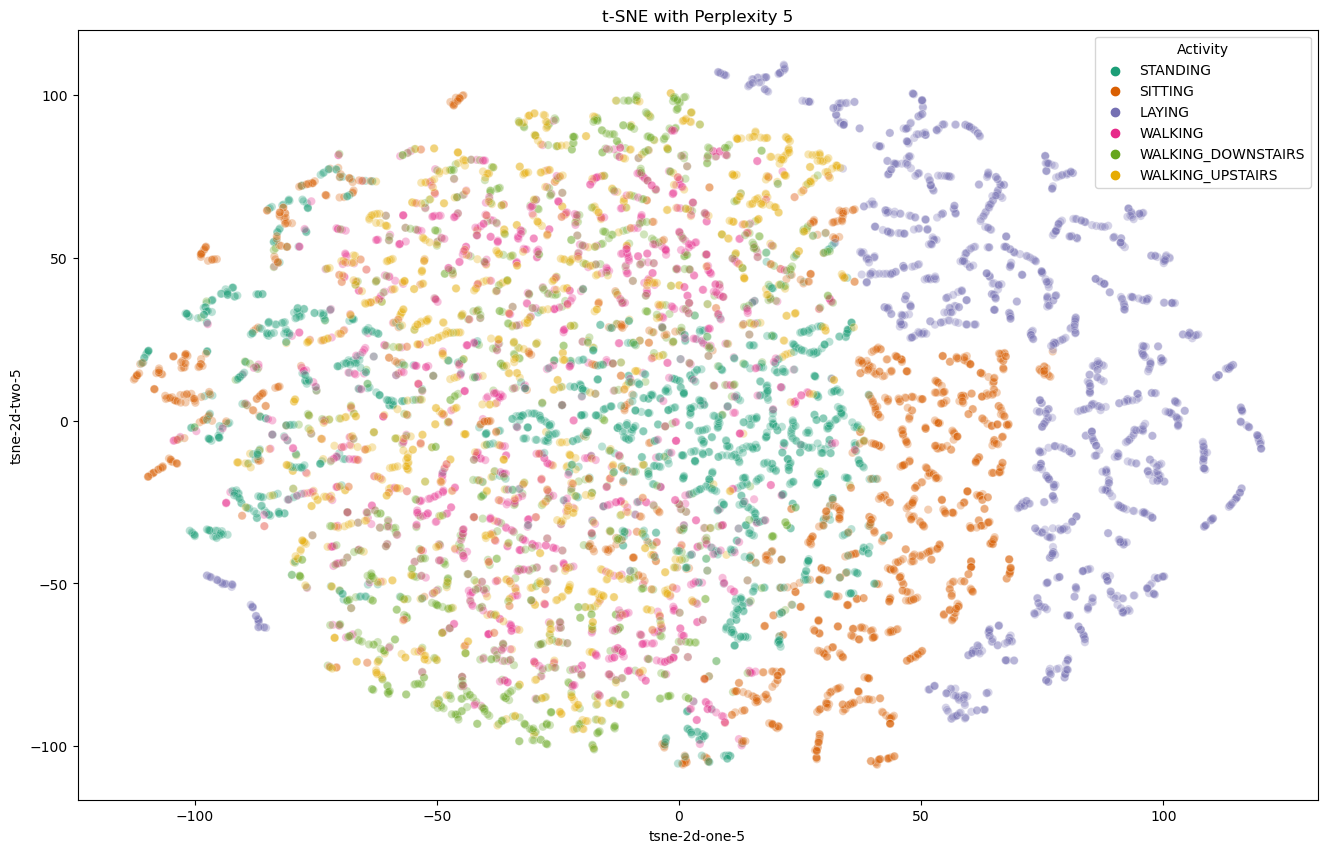

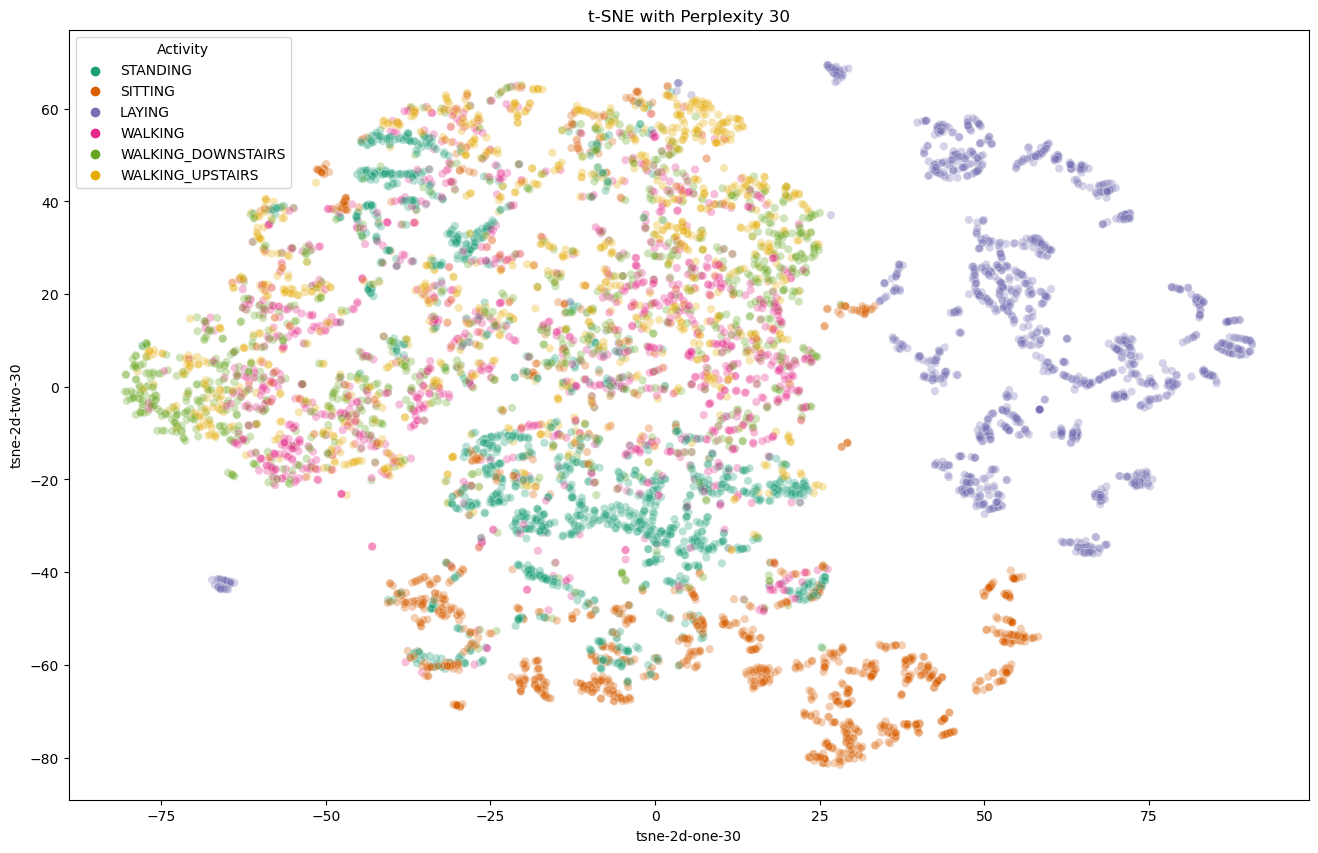

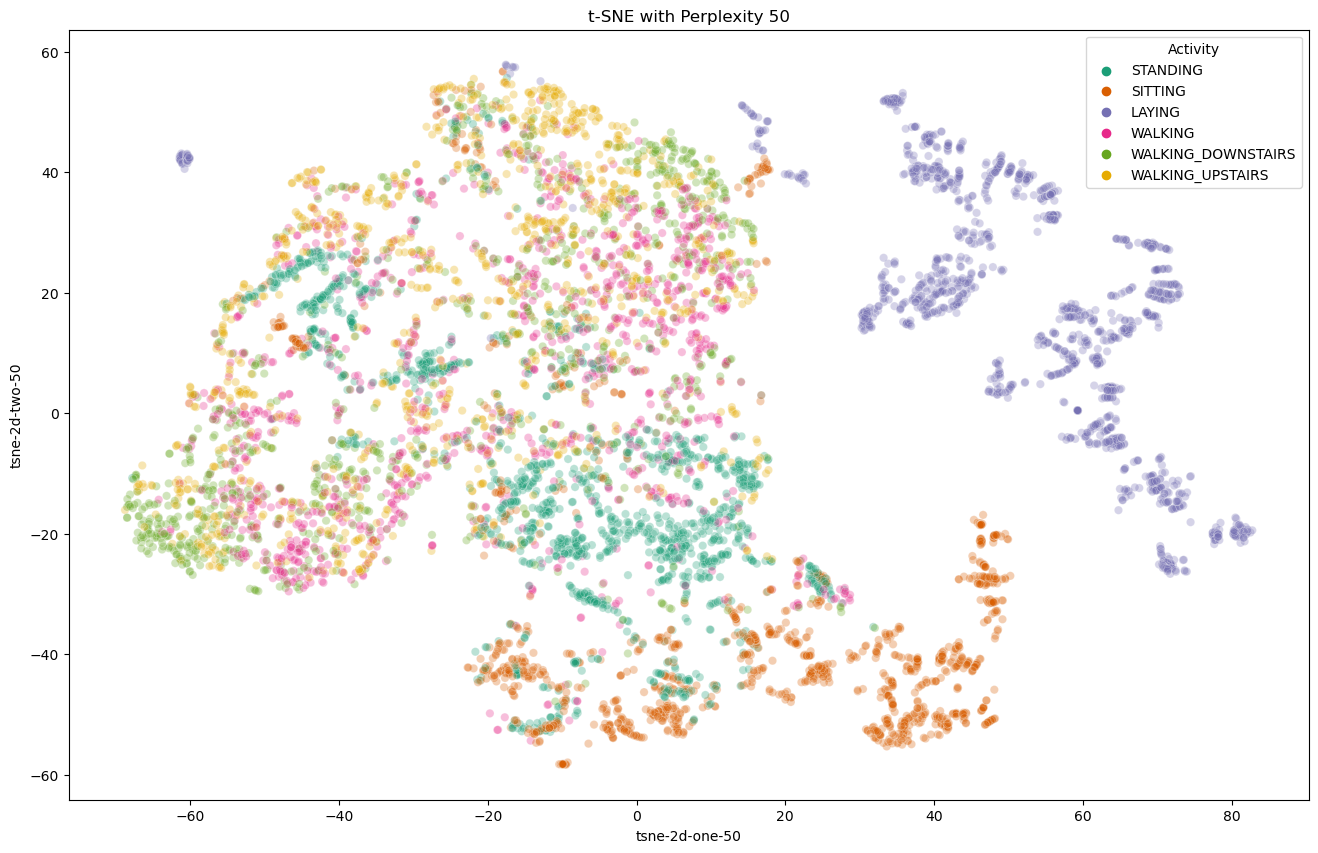

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Define perplexities to test
perplexities = [5, 30, 50]

# Define the custom palette
custom_palette = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", "#e6ab02"]
cmap = sns.color_palette(custom_palette)
# Apply t-SNE and visualize
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(features_scaled)
    
    data[f'tsne-2d-one-{perplexity}'] = tsne_results[:,0]
    data[f'tsne-2d-two-{perplexity}'] = tsne_results[:,1]
    
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x=f'tsne-2d-one-{perplexity}', y=f'tsne-2d-two-{perplexity}',
        hue='Activity',
        palette=cmap,
        data=data,
        legend="full",
        alpha=0.3
    )
    plt.title(f't-SNE with Perplexity {perplexity}')
    # save as png
    plt.savefig(f'tsne_by_activity_perplexity_{perplexity}.png', bbox_inches='tight')
    
    plt.show()



## T-SNE by Activity

The provided t-SNE charts illustrate the impact of different perplexity values on the visualization of human activity recognition data. Each chart shows data points colored by activity type: STANDING, SITTING, LAYING, WALKING, WALKING_DOWNSTAIRS, and WALKING_UPSTAIRS.

### Chart 1: t-SNE with Perplexity 5
t-SNE with Perplexity 5

- **Observation**: The data points are highly scattered with significant overlap between different activity types. The clusters are not well-defined, making it difficult to distinguish between activities.
- **Insight**: A low perplexity value of 5 does not capture the global structure of the data effectively, leading to poor separation of activity types.

### Chart 2: t-SNE with Perplexity 30
t-SNE with Perplexity 30

- **Observation**: The clusters are more distinct compared to the perplexity 5 plot. There is a clearer separation between different activity types, although some overlap still exists.
- **Insight**: A perplexity value of 30 provides a better balance between local and global data structure, resulting in more distinguishable clusters.

### Chart 3: t-SNE with Perplexity 50
t-SNE with Perplexity 50

- **Observation**: The clusters are even more distinct, with a clear separation between different activity types. The data points are grouped more tightly within their respective clusters.
- **Insight**: A higher perplexity value of 50 captures the global structure of the data well, leading to well-separated and distinct clusters.


### Overall Analysis
- **Perplexity Impact**: Higher perplexity values (e.g., 30 and 50) tend to produce better-separated clusters in the t-SNE visualization, which is crucial for distinguishing between different human activities.
- **Optimal Perplexity**: Based on the KL Divergence chart and the t-SNE visualizations, a perplexity value around 50 appears to be optimal for this dataset, as it minimizes KL Divergence and provides clear, distinct clusters.

In summary, for human activity recognition using t-SNE, higher perplexity values (around 50) are recommended as they provide a better representation of the data, leading to more distinct and meaningful clusters.